## Artificial Intelligence Assignment 2
## No6. Neural Network 3
## 20132651 Sungjae Lee

In [1]:
import torch

In [2]:
class MyReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.clamp(min = 0)
    
    @staticmethod
    def backward(ctx, grad_y):
        x, = ctx.saved_tensors
        grad_input = grad_y.clone()
        grad_input[x < 0] = 0
        return grad_input

In [3]:
def my_relu(x):
    return MyReLU.apply(x)

In [4]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [5]:
x = torch.randn(N, D_in, dtype = torch.float)
y = torch.randn(N, D_out, dtype = torch.float)
w1 = torch.randn(D_in, H, dtype = torch.float, requires_grad=True)
w2 = torch.randn(H, D_out, dtype = torch.float, requires_grad=True)

In [6]:
learning_rate = 1e-6
loss_list = []

In [7]:
for t in range(500):
    y_pred = my_relu(x.mm(w1)).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    loss_list.append(loss.item())
    print(t, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        w1.grad.zero_()
        w2.grad.zero_()

0 29202250.0
1 24728066.0
2 23608274.0
3 22405052.0
4 19642790.0
5 15220240.0
6 10550525.0
7 6696583.0
8 4119053.5
9 2555647.5
10 1662366.5
11 1149726.5
12 847287.1875
13 658122.375
14 531822.8125
15 441768.46875
16 373919.75
17 320604.25
18 277407.75
19 241601.421875
20 211467.875
21 185838.21875
22 163909.984375
23 145025.46875
24 128652.7265625
25 114420.921875
26 101992.015625
27 91093.984375
28 81522.859375
29 73088.2734375
30 65637.53125
31 59035.87890625
32 53170.8828125
33 47956.5234375
34 43313.953125
35 39176.77734375
36 35487.265625
37 32180.625
38 29211.962890625
39 26544.408203125
40 24144.291015625
41 21983.271484375
42 20034.23046875
43 18273.498046875
44 16682.56640625
45 15241.546875
46 13933.2744140625
47 12746.6953125
48 11669.365234375
49 10690.095703125
50 9799.015625
51 8987.9814453125
52 8249.794921875
53 7576.16552734375
54 6961.28857421875
55 6399.86962890625
56 5886.7255859375
57 5417.45703125
58 4988.1240234375
59 4595.2900390625
60 4235.39208984375
61 3905.1

388 0.00011361468204995617
389 0.00011106578313047066
390 0.0001084692485164851
391 0.0001064267780748196
392 0.00010455890151206404
393 0.0001025609890348278
394 0.00010052281140815467
395 9.826605673879385e-05
396 9.62362828431651e-05
397 9.468060306971893e-05
398 9.259263606509194e-05
399 9.098136069951579e-05
400 8.89087823452428e-05
401 8.759927732171491e-05
402 8.566460746806115e-05
403 8.380809595109895e-05
404 8.234931738115847e-05
405 8.124962914735079e-05
406 7.979739166330546e-05
407 7.851609552744776e-05
408 7.729559729341418e-05
409 7.569435547338799e-05
410 7.442020432790741e-05
411 7.315589027712122e-05
412 7.189409370766953e-05
413 7.066935359034687e-05
414 6.953866250114515e-05
415 6.844821473350748e-05
416 6.727056461386383e-05
417 6.631563883274794e-05
418 6.519974704133347e-05
419 6.417847180273384e-05
420 6.32497831247747e-05
421 6.232513987924904e-05
422 6.151204433990642e-05
423 6.050822412362322e-05
424 5.93856348132249e-05
425 5.8522826293483377e-05
426 5.75451

In [8]:
import matplotlib.pyplot as plt

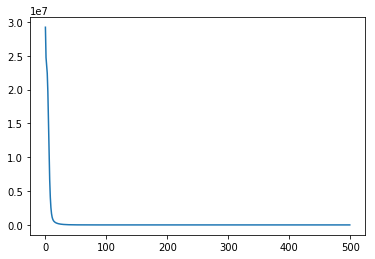

In [9]:
plt.plot(loss_list)